<a href="https://colab.research.google.com/github/jibbsmathew/AirBnB-NewYorkCity/blob/main/AirBnB_NYC_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, itertools, re
import folium

In [76]:
if 'google.colab' in sys.modules:
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [77]:
df_train= pd.read_csv('airbnb_data.csv')
df=df_train.copy()

In [78]:
pd.set_option('display.max_columns', None)
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,7739955,1438,38614070,Shared room,NaN,New York,Queens,Jackson Heights,6,5.0,4,1.0,NaN,85.0,NaN,"Room TO SHARE by DAY,week,month",House,2017-07-15 21:30:31.858764,40.749909,-73.876880,0101000020E61000000EA14ACD1E7852C0F0FCA204FD5F...
1,7383173,1438,32628813,Shared room,NaN,New York,Brooklyn,Cypress Hills,14,4.0,6,1.0,NaN,90.0,NaN,Spacious Room: Close to Manhattan,House,2017-07-15 21:30:30.332828,40.678527,-73.889584,0101000020E6100000DFC2BAF1EE7852C0FC3905F9D956...
2,10250852,1438,35553123,Shared room,NaN,New York,Brooklyn,Sheepshead Bay,3,4.5,6,1.0,NaN,239.0,NaN,COZY COUCH,Apartment,2017-07-15 21:30:23.607950,40.583041,-73.957976,0101000020E61000009696917A4F7D52C0139D6516A14A...
3,2188359,1438,5029659,Shared room,NaN,New York,Manhattan,Hell's Kitchen,35,5.0,2,1.0,NaN,165.0,NaN,1 Bdrm Apt 1 Block from Times Sq.,Apartment,2017-07-15 21:30:21.832749,40.758374,-73.991955,0101000020E6100000A306D3307C7F52C0801134661261...
4,19661354,1438,70038324,Shared room,NaN,New York,Manhattan,Upper East Side,0,0.0,2,1.0,NaN,159.0,NaN,NYC Upper East / Midtown East Luxury 1BR,Apartment,2017-07-15 21:30:19.986579,40.761960,-73.959733,0101000020E610000016F9F5436C7D52C01A6EC0E78761...


#Exploratory Visualizations

In [79]:
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'property_type', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

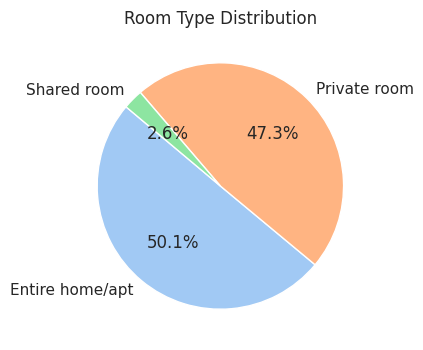

In [80]:
# Visualization: Room Type Distribution as a Pie Chart
room_type_counts = df['room_type'].value_counts()
colors = sns.color_palette('pastel')[0:len(room_type_counts)]

plt.figure(figsize=(6,4))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Room Type Distribution')
plt.show()

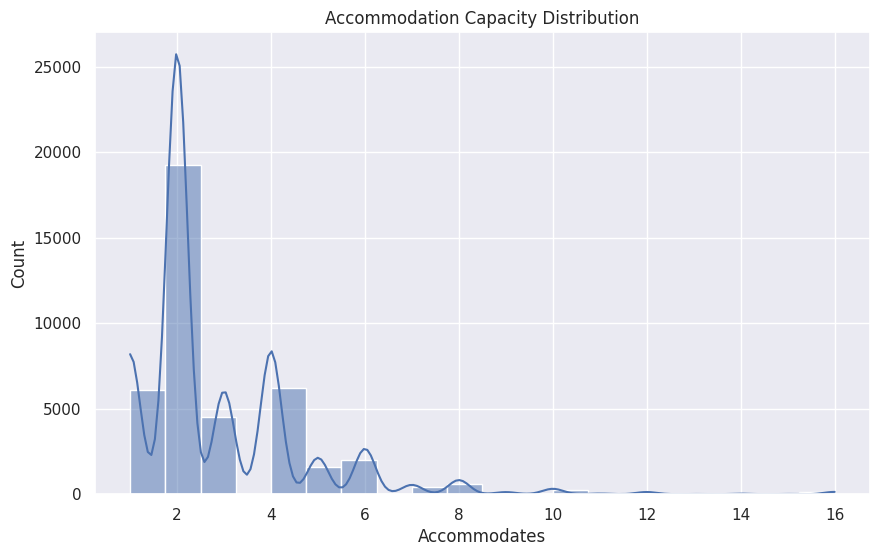

In [81]:
# Visualization 2: Accommodation Capacity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['accommodates'], bins=20, kde=True)
plt.title('Accommodation Capacity Distribution')
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.show()

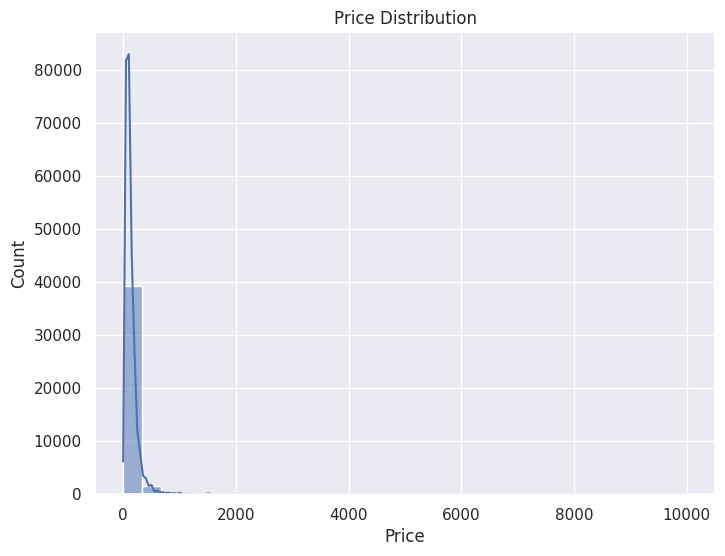

In [82]:
# Visualization 3: Price Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


<ipython-input-83-a3946a6083e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall_satisfaction', data=df, palette='viridis')


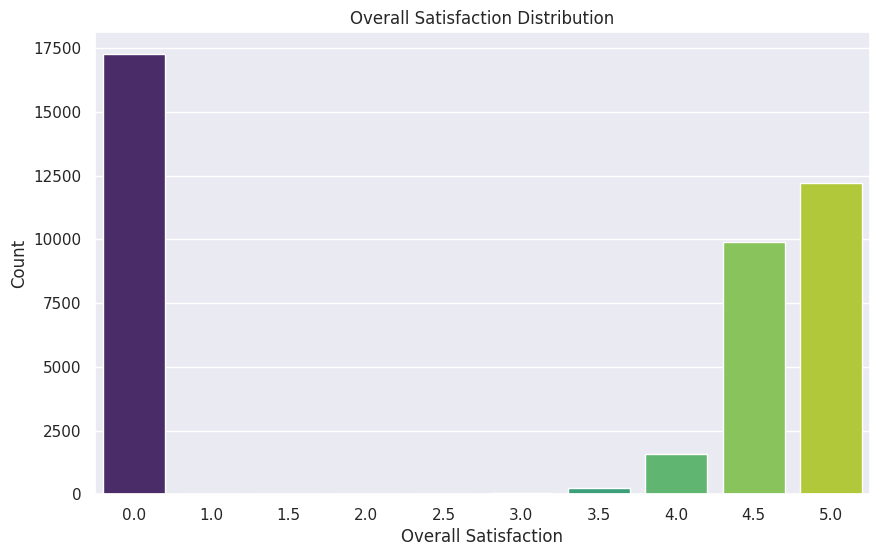

In [83]:
# Visualization: Overall Satisfaction Distribution as a Bar Graph
plt.figure(figsize=(10, 6))
sns.countplot(x='overall_satisfaction', data=df, palette='viridis')
plt.title('Overall Satisfaction Distribution')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Count')
plt.show()


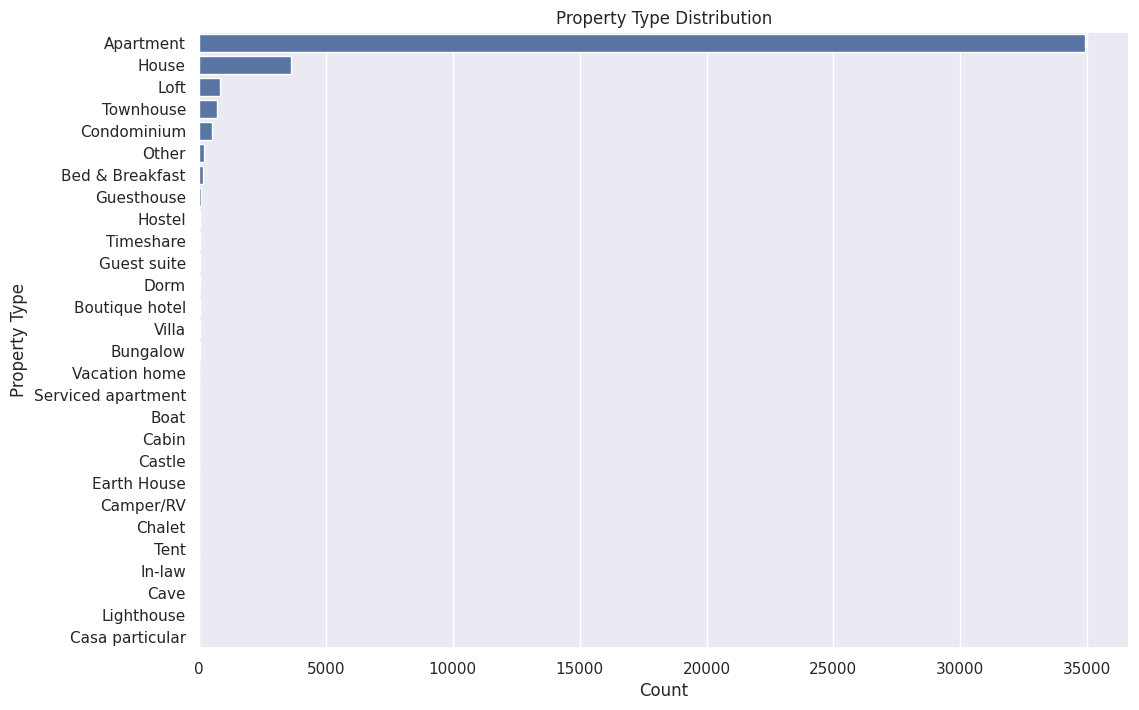

In [84]:
# Visualization: Property Type Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
plt.title('Property Type Distribution')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

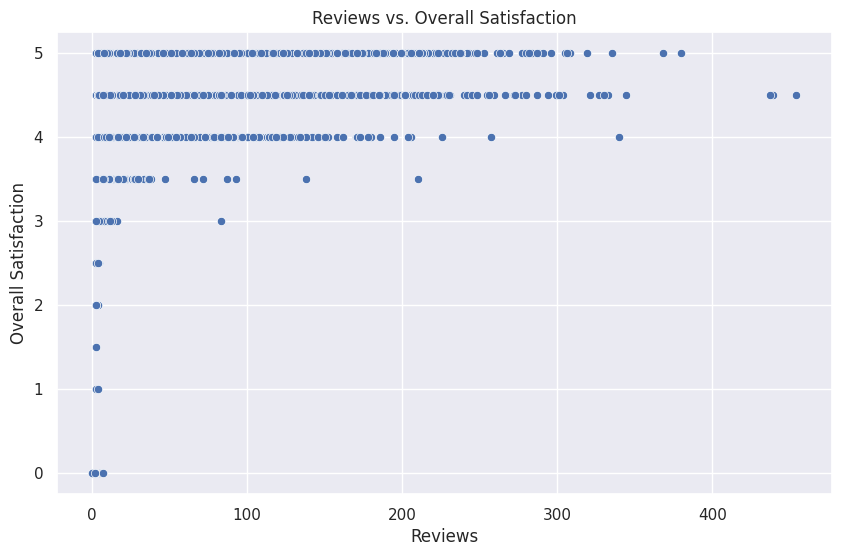

In [85]:
# Visualization: Reviews vs. Overall Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews', y='overall_satisfaction', data=df)
plt.title('Reviews vs. Overall Satisfaction')
plt.xlabel('Reviews')
plt.ylabel('Overall Satisfaction')
plt.show()

In [86]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

room_id                   0.000000
survey_id                 0.000000
host_id                   0.000000
room_type                 0.000000
country                 100.000000
city                      0.000000
borough                   0.000000
neighborhood              0.000000
reviews                   0.000000
overall_satisfaction      0.000000
accommodates              0.000000
bedrooms                  0.000000
bathrooms               100.000000
price                     0.000000
minstay                 100.000000
name                      0.058189
property_type             0.000000
last_modified             0.000000
latitude                  0.000000
longitude                 0.000000
location                  0.000000
dtype: float64

In [87]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,13643,0,23138,2,0,0,3,112,6,9,3,1,0,74,0,30832,17,41244,23730,32525,2405
1,12961,0,21581,2,0,0,1,54,14,7,5,1,0,79,0,33319,17,41243,5810,32155,36113
2,18848,0,22374,2,0,0,1,188,3,8,5,1,0,228,0,8871,0,41242,138,16593,24265
3,4840,0,8286,2,0,0,2,102,35,9,1,1,0,154,0,423,0,41241,25099,5322,26275
4,40382,0,28619,2,0,0,2,214,0,0,1,1,0,148,0,25366,0,41240,25968,15843,3771


In [88]:
df = df[['room_type','bedrooms','price','reviews','overall_satisfaction', 'accommodates', 'latitude', 'longitude']]
df.head()

,room_type,bedrooms,price,reviews,overall_satisfaction,accommodates,latitude,longitude
0,2,1,74,6,9,3,23730,32525
1,2,1,79,14,7,5,5810,32155
2,2,1,228,3,8,5,138,16593
3,2,1,154,35,9,1,25099,5322
4,2,1,148,0,0,1,25968,15843


In [89]:
df.describe()

,room_type,bedrooms,price,reviews,overall_satisfaction,accommodates,latitude,longitude
count,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000
mean,0.525494,1.161450,117.556771,17.409892,4.890120,1.851982,18247.122100,16966.884083
std,0.549385,0.725753,91.822001,31.442288,4.183347,1.865672,10403.896503,9617.687434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,54.000000,1.000000,0.000000,1.000000,9274.000000,8657.000000
50%,0.000000,1.000000,89.000000,4.000000,8.000000,1.000000,18079.000000,17096.000000
75%,1.000000,1.000000,149.000000,19.000000,9.000000,3.000000,27091.000000,24892.000000
max,2.000000,11.000000,581.000000,284.000000,9.000000,15.000000,36757.000000,34400.000000


In [90]:
df.corr()

,room_type,bedrooms,price,reviews,overall_satisfaction,accommodates,latitude,longitude
room_type,1.000000,-0.180804,-0.538536,-0.022493,-0.066995,-0.471469,-0.000201,0.210573
bedrooms,-0.180804,1.000000,0.419011,0.023647,0.014636,0.650239,-0.082420,0.014995
price,-0.538536,0.419011,1.000000,-0.030559,-0.014670,0.562282,0.089090,-0.359253
reviews,-0.022493,0.023647,-0.030559,1.000000,0.445974,0.103529,-0.001843,-0.004456
overall_satisfaction,-0.066995,0.014636,-0.014670,0.445974,1.000000,0.108945,-0.008963,-0.010427
accommodates,-0.471469,0.650239,0.562282,0.103529,0.108945,1.000000,-0.040860,-0.044627
latitude,-0.000201,-0.082420,0.089090,-0.001843,-0.008963,-0.040860,1.000000,0.077366
longitude,0.210573,0.014995,-0.359253,-0.004456,-0.010427,-0.044627,0.077366,1.000000


<Axes: >

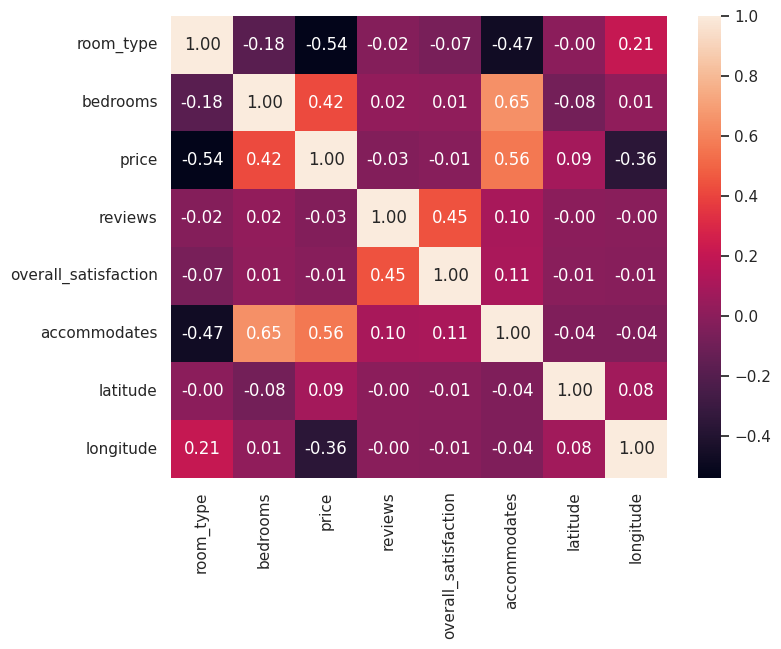

In [91]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

In [92]:
df_train=df.copy()

# 2. Exploratory Data Analysis (EDA)<a id="2"></a>

In [93]:
# unique
def check_unique():
    colname = list(df_train.columns)
    for i in colname:
        print('<<{}>>\n'.format(i), df_train[i].unique())#[:10])
       # if i == 'education':
       #     break

In [94]:
# Check the missing values
def check_na():
    colname = list(df_train.columns)
    for i in colname:
        print("[{}]".format(i), df_train[i].isna().sum())

In [95]:
# Check for unknown for each variable
def check_unknown():
    colname = list(df_train.columns)
    for i in colname:
        print("[{}]".format(i), df_train[i].isin(['unknown']).sum())

In [96]:
check_unique()

<<room_type>>
 [2 0 1]
<<bedrooms>>
 [ 1  2  4  3  5  6  0  7  9 11 10  8]
<<price>>
 [ 74  79 228 154 148 114  89  99  98  94 106  69  84  70  77  78  64  68
  59  54  51  58  52  57  53  61  62  63  56  67  44  39  34  32  36  49
  35  37  42  45  31  29  40  41  38  33  48  46  30  47 277 236 288 189
 188 184 174 171 139 129 164 149 169 158 168 119 124 109 122 118 113 104
  93 107 108  85  88  71  82  87  86  83   2  21  15   6  24  19  28  16
  26  10  18  14   1   3  25  27  23  13  12   9 340 332 365 431 301 385
 310 239 214 209 254 204  17   5  20  22  11   8   4   7 102 570 561 580
 555 542 508 499 526 537 525 507 501 433 179 144 103  76 569 559 556 554
 565 572 581 549 553 541 543 502 512 538 520 539 515 540 500 523 495 514
 521 519 533 522 509 496 536 451 490 480 467 364 264 199 262 194 134 159
 132 123 563 557 573 579 578 575 558 560 571 568 567 577 562 566 552 546
 547 545 258 296 330 249 574 138 131 564 518 454 156 576 513 548 550 551
 544 503 532 516 517 492 458 456 463 4

In [97]:
df_train['bedrooms'].value_counts()

1     30052
2      5253
0      3771
3      1590
4       419
5       107
6        31
7        10
8         5
10        4
9         2
11        1
Name: bedrooms, dtype: int64

In [98]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries used for Modelling
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [99]:
# To convert NaN values to 0 for preparation for Modelling
newdf = df.fillna(0)
# Checking to ensure that there are no NULL entries
newdf.isnull().sum()

room_type               0
bedrooms                0
price                   0
reviews                 0
overall_satisfaction    0
accommodates            0
latitude                0
longitude               0
dtype: int64

In [100]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newdf, columns=['room_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})

newTransformedDF.head()

,bedrooms,price,reviews,overall_satisfaction,accommodates,latitude,longitude,room_type_0,room_type_1,room_type_2
0,1,74,6,9,3,23730,32525,0,0,1
1,1,79,14,7,5,5810,32155,0,0,1
2,1,228,3,8,5,138,16593,0,0,1
3,1,154,35,9,1,25099,5322,0,0,1
4,1,148,0,0,1,25968,15843,0,0,1


In [101]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "room_type_0","room_type_1",'room_type_2','reviews', 'overall_satisfaction','accommodates', 'latitude']]) #Predictor Variable
y = pd.DataFrame(newTransformedDF["price"]) #Response Variable

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
# Creating and fitting the model
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Intercept of Regression 	: b =  [117.47152106]

             Predictors  Coefficients
0              bedrooms  1.637873e+01
1           room_type_0  5.449821e+13
2           room_type_1  5.441892e+13
3           room_type_2  1.742080e+13
4               reviews -5.743896e+00
5  overall_satisfaction -2.903748e+00
6          accommodates  2.468750e+01
7              latitude  1.129590e+01



Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

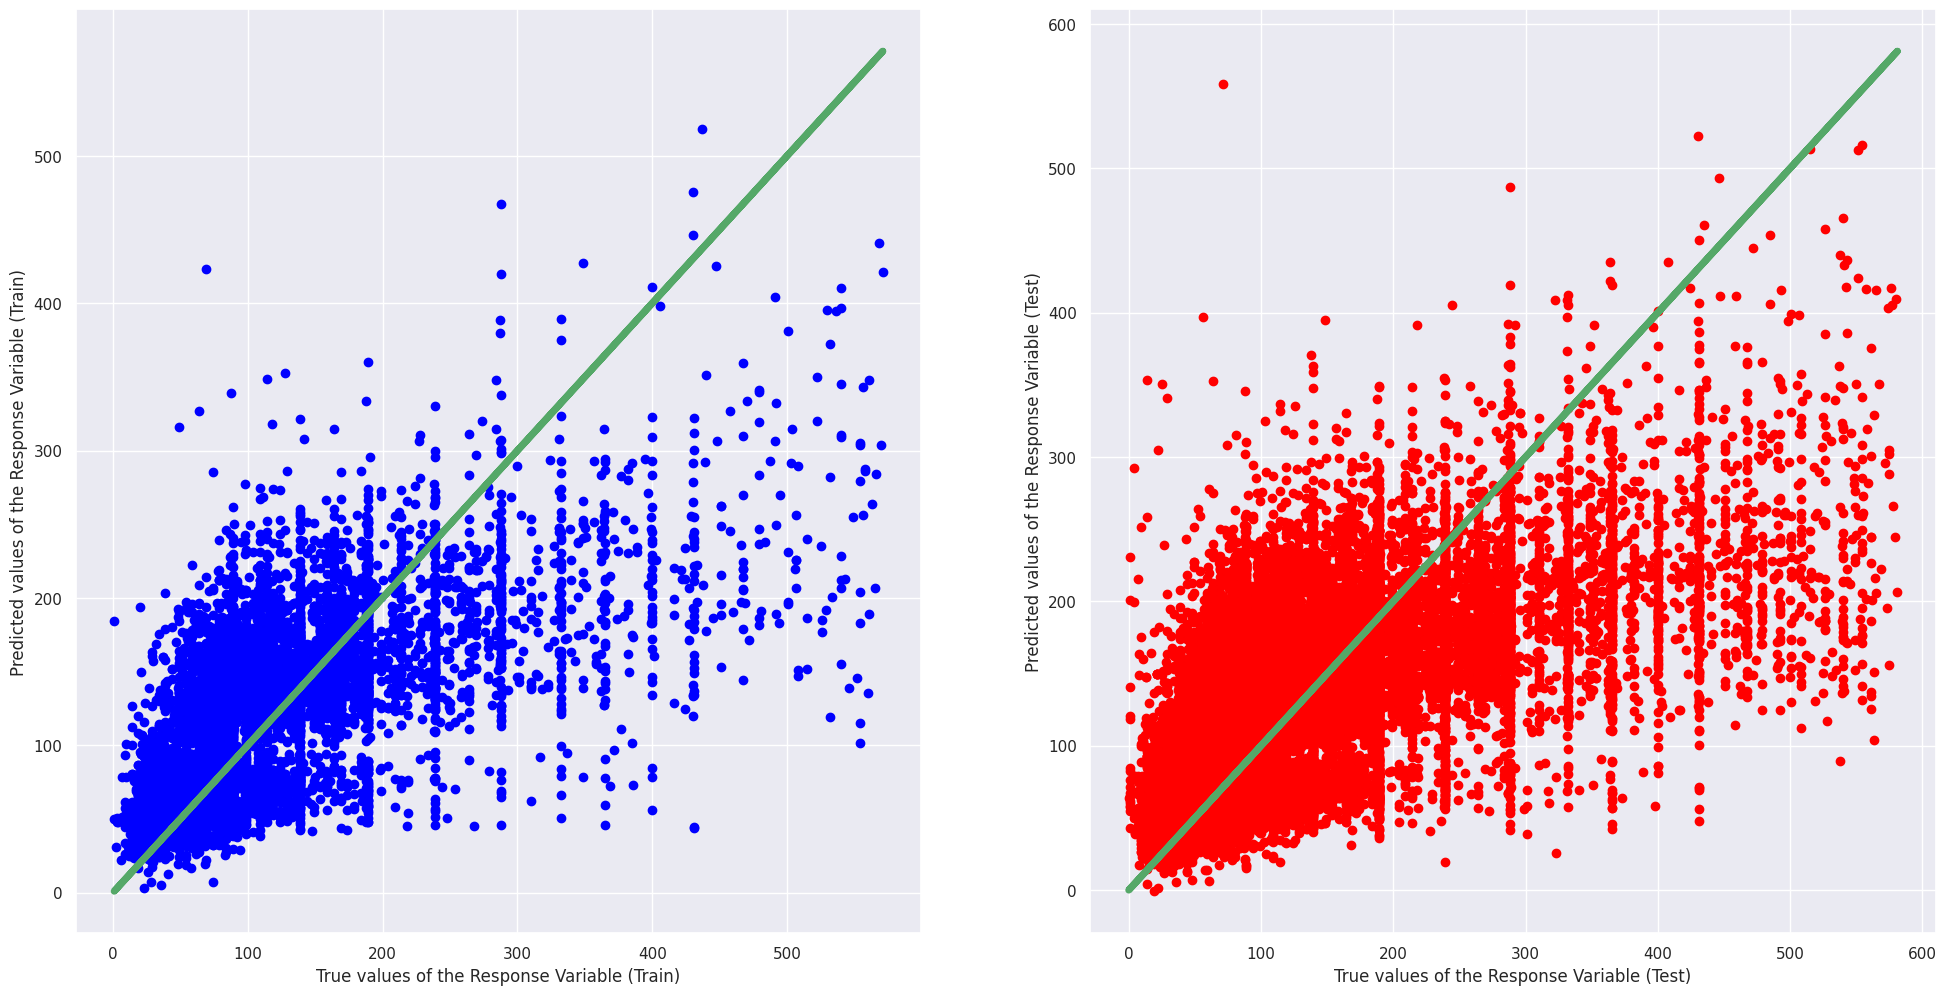

In [103]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

In [104]:
#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     4341.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        03:03:04   Log-Likelihood:            -2.3235e+05
No. Observations:               41245   AIC:                         4.647e+05
Df Residuals:                   41236   BIC:                         4.648e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  117.5568 

In [105]:
df_train.head

<bound method NDFrame.head of        room_type  bedrooms  price  reviews  overall_satisfaction  \
0              2         1     74        6                     9   
1              2         1     79       14                     7   
2              2         1    228        3                     8   
3              2         1    154       35                     9   
4              2         1    148        0                     0   
...          ...       ...    ...      ...                   ...   
41240          1         1      9        0                     0   
41241          1         1     24       51                     8   
41242          1         1     20        0                     0   
41243          1         1     19        2                     0   
41244          1         1     19       46                     9   

       accommodates  latitude  longitude  
0                 3     23730      32525  
1                 5      5810      32155  
2                 5     